## Libraries

In [1]:
#general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
#libraries calculate the performance
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, confusion_matrix, average_precision_score 

In [3]:
#libraries for classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
#model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

In [5]:
#libraries for unbalanced data
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

Using TensorFlow backend.


In [6]:
#other libraries
import warnings
import random
from collections import Counter

In [7]:
#dataset
ds = pd.read_csv("imbalanced_edm_vit_data.csv")
ds.head()

,Email Address,Gender,Nationality,Mother Tongue/ First Language,Teaching Language in University,High School Percentage,Present Year of Study (Status),Living Location,Any Parent Works in University?,Does Student has scholarship?,...,Mother's Qualification,Father's Occupation Status,Mother's Occupation Status,No. of Friends,Average number of hours you spend with your friends in one week,CGPA,Does the student have any outside sponsorship for study?,Religion,No. of languages you know,Result
0,kumarkaushik1580@gmail.com,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Graduate,Currently in Service,Currently in Service,Average,Average(2-8 hours),Fair (6.0 - 8.5),No,Hindu,2,Pass
1,divam.kesharwani@gmail.com,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Graduate,Currently in Service,NaN,Average,Average(2-8 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
2,vbhandari2999@gmail.com,Male,Indian,English,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Post Graduate,Currently in Service,Currently in Service,Average,Above Average (8-14 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
3,unnatbasa@gmail.com,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Graduate,Currently in Service,Currently in Service,High,Above Average (8-14 hours),Fair (6.0 - 8.5),No,Hindu,>2,Pass
4,devamsheth0806@gmail.com,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Very Good (80-90%),3rd Year,Inside campus,No,Yes,...,Secondary/High School,Currently in Service,NaN,Above Average,Average(2-8 hours),Very Good (9.0 - 9.5),Yes,Hindu,>2,Pass


### Data Preprocessing

In [8]:
ds.isnull().values.any()

True

In [9]:
ds.nunique()

Email Address                                                      314
Gender                                                               2
Nationality                                                          3
Mother Tongue/ First Language                                        3
Teaching Language in University                                      2
High School Percentage                                               4
Present Year of Study (Status)                                       4
Living Location                                                      2
Any Parent Works in University?                                      1
Does Student has scholarship?                                        2
How the student comes to University?                                 2
Family Size                                                          4
Total family income                                                  4
Parents Marital Status                                               4
Father

In [10]:
ds.shape

(321, 25)

In [11]:
dx = ds

In [12]:
#removing columns which have no use or have same values throughout the dataset
dx.drop(['Email Address', 'Any Parent Works in University?'], axis = 1, inplace = True)
dx.nunique()

Gender                                                             2
Nationality                                                        3
Mother Tongue/ First Language                                      3
Teaching Language in University                                    2
High School Percentage                                             4
Present Year of Study (Status)                                     4
Living Location                                                    2
Does Student has scholarship?                                      2
How the student comes to University?                               2
Family Size                                                        4
Total family income                                                4
Parents Marital Status                                             4
Father's Qualification                                             6
Mother's Qualification                                             5
Father's Occupation Status        

In [13]:
dx.head()

,Gender,Nationality,Mother Tongue/ First Language,Teaching Language in University,High School Percentage,Present Year of Study (Status),Living Location,Does Student has scholarship?,How the student comes to University?,Family Size,...,Mother's Qualification,Father's Occupation Status,Mother's Occupation Status,No. of Friends,Average number of hours you spend with your friends in one week,CGPA,Does the student have any outside sponsorship for study?,Religion,No. of languages you know,Result
0,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,Medium Family,...,Graduate,Currently in Service,Currently in Service,Average,Average(2-8 hours),Fair (6.0 - 8.5),No,Hindu,2,Pass
1,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,With both parents / Nuclear Family,...,Graduate,Currently in Service,NaN,Average,Average(2-8 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
2,Male,Indian,English,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,Medium Family,...,Post Graduate,Currently in Service,Currently in Service,Average,Above Average (8-14 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
3,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,With both parents / Nuclear Family,...,Graduate,Currently in Service,Currently in Service,High,Above Average (8-14 hours),Fair (6.0 - 8.5),No,Hindu,>2,Pass
4,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Very Good (80-90%),3rd Year,Inside campus,Yes,Walking,With both parents / Nuclear Family,...,Secondary/High School,Currently in Service,NaN,Above Average,Average(2-8 hours),Very Good (9.0 - 9.5),Yes,Hindu,>2,Pass


In [14]:
#finding columns which have string based values
categ_cols = list(ds.select_dtypes(exclude = ["number"]).columns)
categ_cols

['Gender',
 'Nationality',
 'Mother Tongue/ First Language',
 'Teaching Language in University',
 'High School Percentage',
 'Present Year of Study (Status)',
 'Living Location',
 'Does Student has scholarship?',
 'How the student comes to University?',
 'Family Size',
 'Total family income',
 'Parents Marital Status',
 "Father's Qualification",
 "Mother's Qualification",
 "Father's Occupation Status",
 "Mother's Occupation Status",
 'No. of Friends',
 'Average number of hours you spend with your friends in one week',
 'CGPA',
 'Does the student have any outside sponsorship for study?',
 'Religion',
 'No. of languages you know',
 'Result']

In [15]:
#encoding the data,
def encode (col_name):
    col_cats = list(dx[col_name].unique())
    col_encoded = {}
    for i in range (len(col_cats)) :
        col_encoded[col_cats[i]] = i
    return (col_encoded)

In [16]:
cleanup_nums = {}
for i in categ_cols:
    cleanup_nums[i] = encode(i)

In [17]:
dx.replace(cleanup_nums, inplace=True)
dx.head()

,Gender,Nationality,Mother Tongue/ First Language,Teaching Language in University,High School Percentage,Present Year of Study (Status),Living Location,Does Student has scholarship?,How the student comes to University?,Family Size,...,Mother's Qualification,Father's Occupation Status,Mother's Occupation Status,No. of Friends,Average number of hours you spend with your friends in one week,CGPA,Does the student have any outside sponsorship for study?,Religion,No. of languages you know,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,0,0,2,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0,0,2,0,1,0,0,1,0,1,...,2,0,1,2,0,1,1,0,1,0


In [18]:
X = dx.iloc[:,:-1]
y = dx.iloc[:,-1]
X.shape, y.shape

((321, 22), (321,))

### Functions for sampling-classifiaction process

In [19]:
#sampling function
def reSampler(X, y, samp):
    if(samp == 'None'):
        return splitter(X, y, 0.15)
    if(samp == 'RandomUnderSampler'):
        sm = RandomUnderSampler()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'NearMiss'):
        sm = NearMiss()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'CondensedNearestNeighbour'):
        sm = CondensedNearestNeighbour()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'TomekLinks'):
        sm = TomekLinks()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'EditedNearestNeighbours'):
        sm = EditedNearestNeighbours()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'RepeatedEditedNearestNeighbours'):
        sm = RepeatedEditedNearestNeighbours()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'RandomOverSampler'):
        sm = RandomOverSampler()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'SMOTE'):
        sm = SMOTE()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'SMOTEENN'):
        sm = SMOTEENN()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'SMOTETomek'):
        sm = SMOTEENN()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)

In [20]:
#dataset splitting function
def splitter(X, y, test_Size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_Size, random_state=12)
    return X_train, X_test, y_train, y_test

In [21]:
#roc curve plotting function
def rocPlotter(actu, pred, clf, samp):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actu, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    Title = str('ROC: ' + str(clf) + ' using ' + str(samp))
    plt.title(Title)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

In [22]:
#classification model function
def applyModel(clf, X_, y_, xt, yt):
    a = globals()[clf]()
    a.fit(X_, y_)
    scor = a.score(xt, yt)*100
    pred = a.predict(xt)
    actu = yt
    return pred, actu, scor

In [23]:
#main execution function
def tryAll(clfList, sampList, Inputs, Outputs):
    rep = np.zeros((len(clfList), len(sampList)), dtype=float)
    for clf, clfIndex in zip(clfList, range(len(clfList))):
        for samp, sampIndex in zip(sampList, range(len(sampList))):
            X_train, X_test, y_train, y_test = reSampler(Inputs, Outputs, samp)
            prediction , actual, score =applyModel(clf, X_train, y_train, X_test, y_test)
            currentAUC = rocPlotter(prediction, actual, clf, samp)
            print(clf, ' with ', samp, ' scored =  ', score, ' on test set with AUC = ', currentAUC)
            rep[clfIndex, sampIndex] = currentAUC
    return rep

### Execution

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


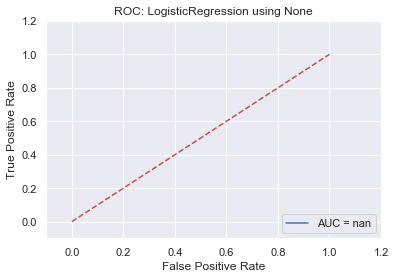

LogisticRegression  with  None  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


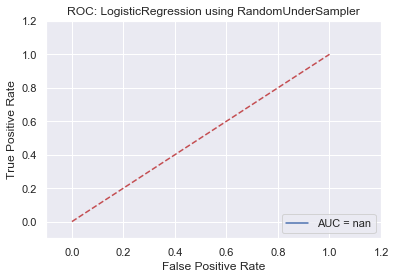

LogisticRegression  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


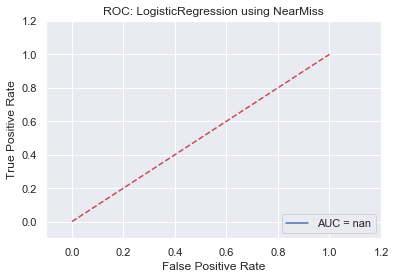

LogisticRegression  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


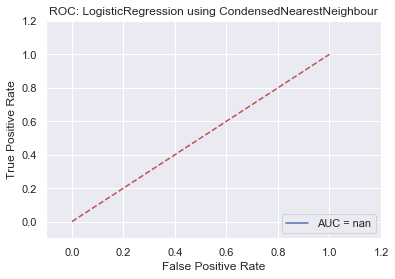

LogisticRegression  with  CondensedNearestNeighbour  scored =   81.81818181818183  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


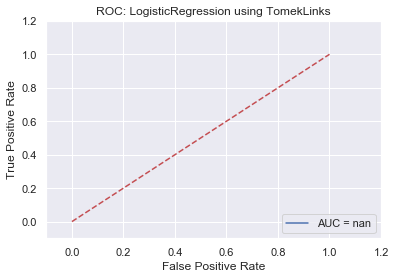

LogisticRegression  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


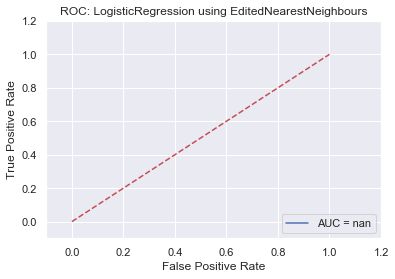

LogisticRegression  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


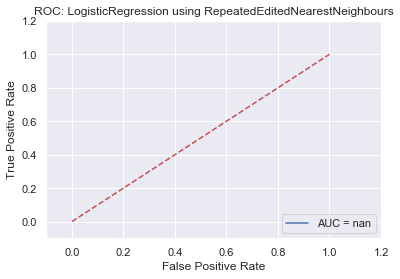

LogisticRegression  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


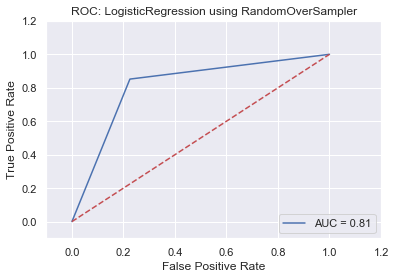

LogisticRegression  with  RandomOverSampler  scored =   81.91489361702128  on test set with AUC =  0.813425925925926


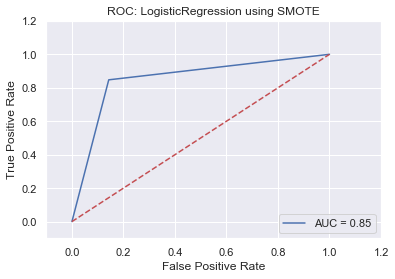

LogisticRegression  with  SMOTE  scored =   85.1063829787234  on test set with AUC =  0.8523002421307506


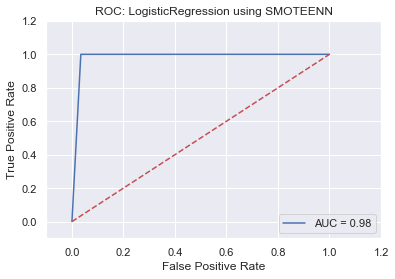

LogisticRegression  with  SMOTEENN  scored =   98.68421052631578  on test set with AUC =  0.9827586206896552


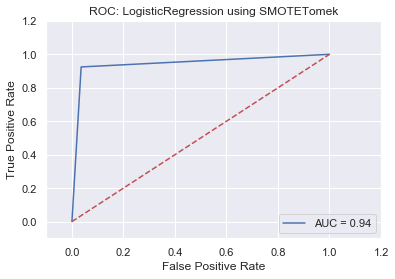

LogisticRegression  with  SMOTETomek  scored =   93.82716049382715  on test set with AUC =  0.9444070080862533


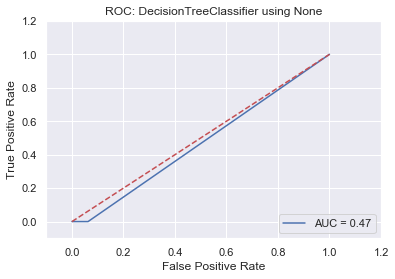

DecisionTreeClassifier  with  None  scored =   91.83673469387756  on test set with AUC =  0.46875


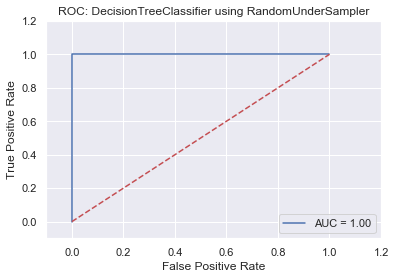

DecisionTreeClassifier  with  RandomUnderSampler  scored =   100.0  on test set with AUC =  1.0


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


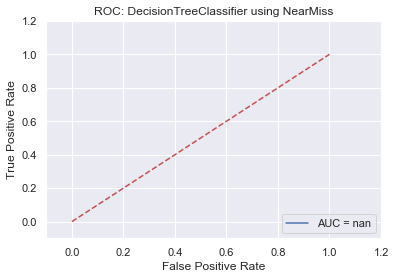

DecisionTreeClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


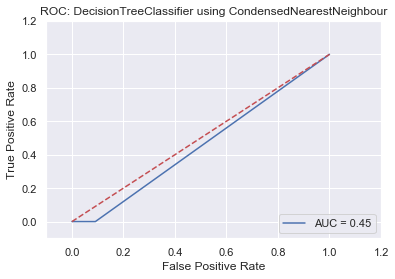

DecisionTreeClassifier  with  CondensedNearestNeighbour  scored =   83.33333333333334  on test set with AUC =  0.45454545454545453


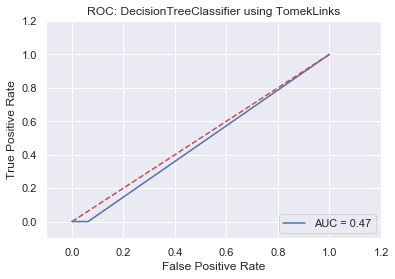

DecisionTreeClassifier  with  TomekLinks  scored =   91.83673469387756  on test set with AUC =  0.46875


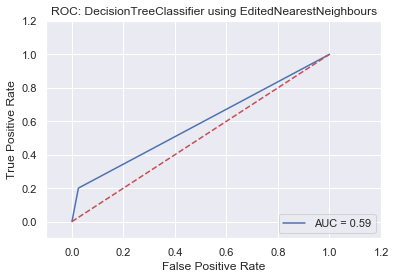

DecisionTreeClassifier  with  EditedNearestNeighbours  scored =   88.88888888888889  on test set with AUC =  0.5874999999999999


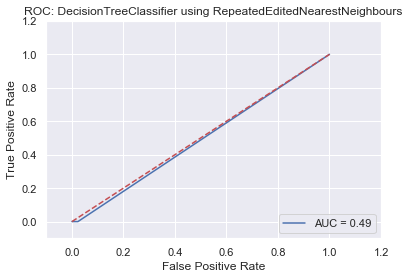

DecisionTreeClassifier  with  RepeatedEditedNearestNeighbours  scored =   95.45454545454545  on test set with AUC =  0.4883720930232558


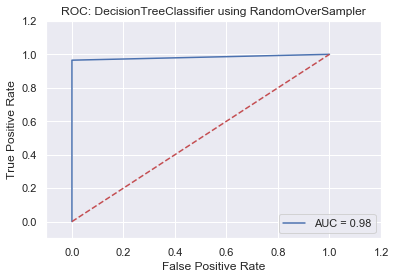

DecisionTreeClassifier  with  RandomOverSampler  scored =   97.87234042553192  on test set with AUC =  0.9824561403508771


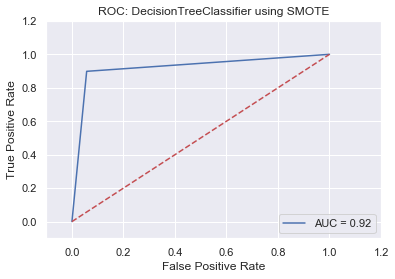

DecisionTreeClassifier  with  SMOTE  scored =   91.48936170212765  on test set with AUC =  0.9205811138014528


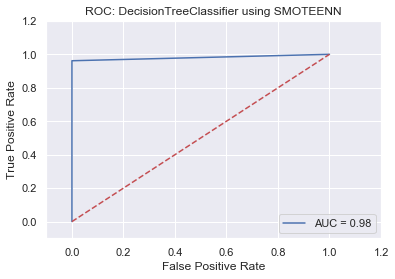

DecisionTreeClassifier  with  SMOTEENN  scored =   97.53086419753086  on test set with AUC =  0.9807692307692308


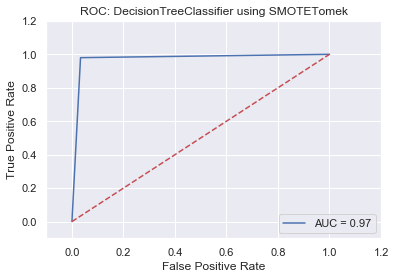

DecisionTreeClassifier  with  SMOTETomek  scored =   97.5  on test set with AUC =  0.9733333333333333


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


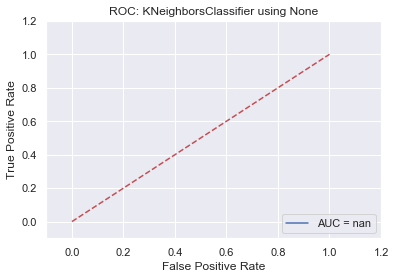

KNeighborsClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


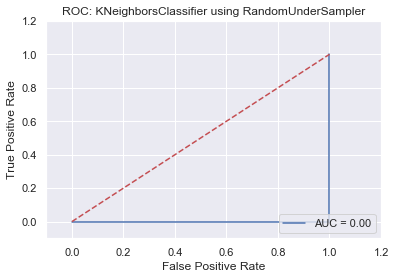

KNeighborsClassifier  with  RandomUnderSampler  scored =   0.0  on test set with AUC =  0.0


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


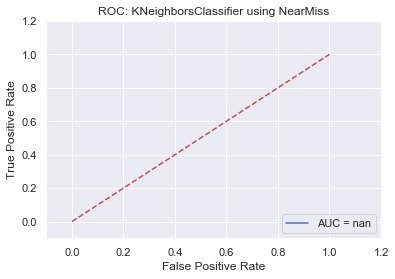

KNeighborsClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


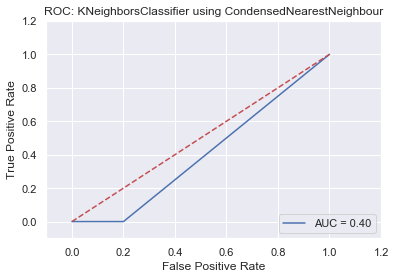

KNeighborsClassifier  with  CondensedNearestNeighbour  scored =   72.72727272727273  on test set with AUC =  0.4


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


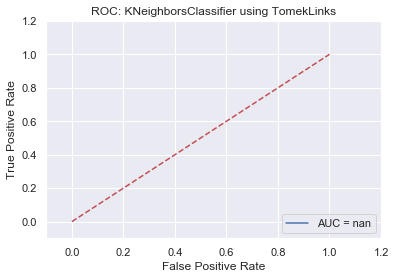

KNeighborsClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


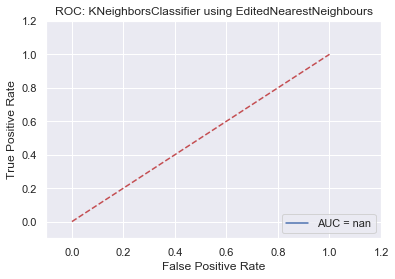

KNeighborsClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


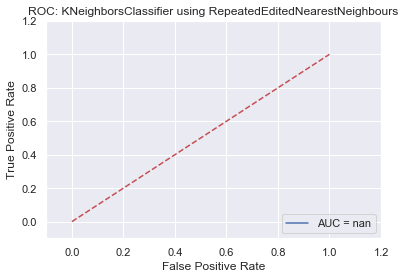

KNeighborsClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


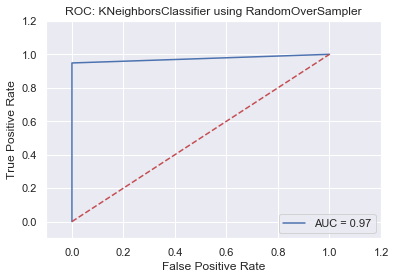

KNeighborsClassifier  with  RandomOverSampler  scored =   96.80851063829788  on test set with AUC =  0.9741379310344828


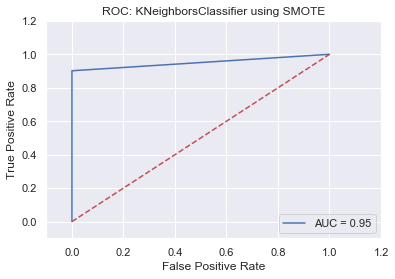

KNeighborsClassifier  with  SMOTE  scored =   93.61702127659575  on test set with AUC =  0.9508196721311475


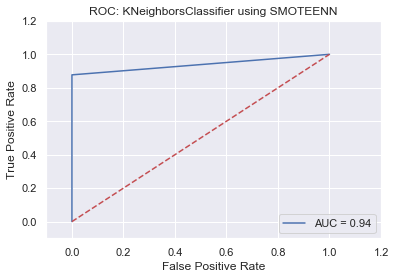

KNeighborsClassifier  with  SMOTEENN  scored =   91.25  on test set with AUC =  0.9385964912280702


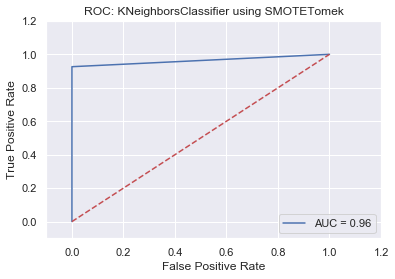

KNeighborsClassifier  with  SMOTETomek  scored =   95.06172839506173  on test set with AUC =  0.962962962962963


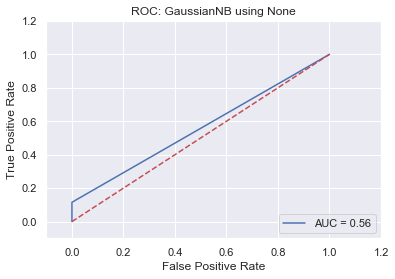

GaussianNB  with  None  scored =   53.06122448979592  on test set with AUC =  0.5576923076923077


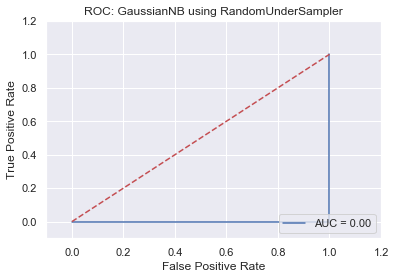

GaussianNB  with  RandomUnderSampler  scored =   0.0  on test set with AUC =  0.0


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


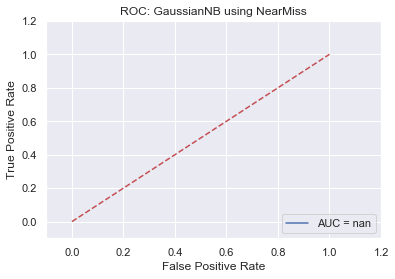

GaussianNB  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


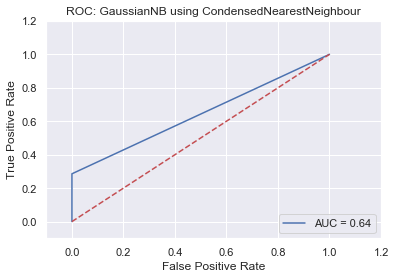

GaussianNB  with  CondensedNearestNeighbour  scored =   54.54545454545454  on test set with AUC =  0.6428571428571428


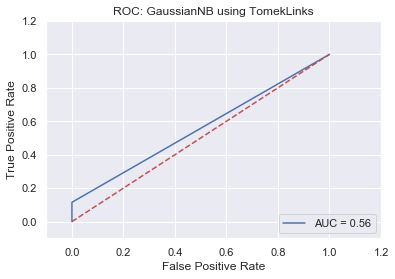

GaussianNB  with  TomekLinks  scored =   53.06122448979592  on test set with AUC =  0.5576923076923077


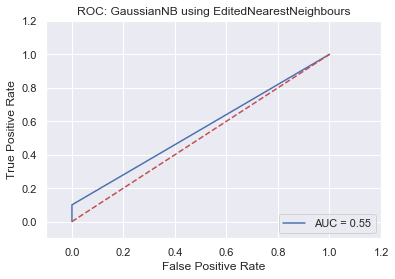

GaussianNB  with  EditedNearestNeighbours  scored =   60.0  on test set with AUC =  0.55


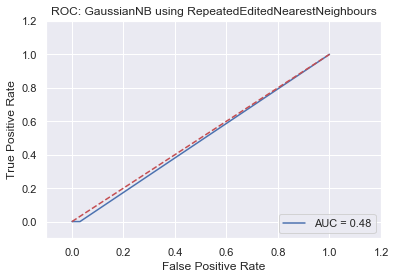

GaussianNB  with  RepeatedEditedNearestNeighbours  scored =   70.45454545454545  on test set with AUC =  0.484375


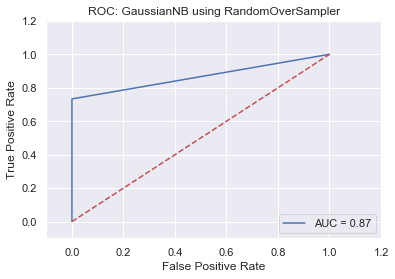

GaussianNB  with  RandomOverSampler  scored =   78.72340425531915  on test set with AUC =  0.8666666666666667


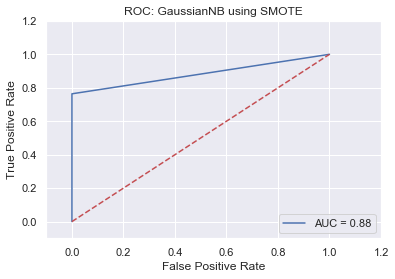

GaussianNB  with  SMOTE  scored =   81.91489361702128  on test set with AUC =  0.8819444444444444


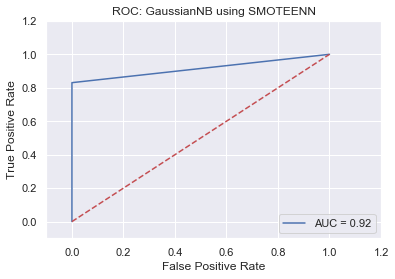

GaussianNB  with  SMOTEENN  scored =   87.5  on test set with AUC =  0.9152542372881356


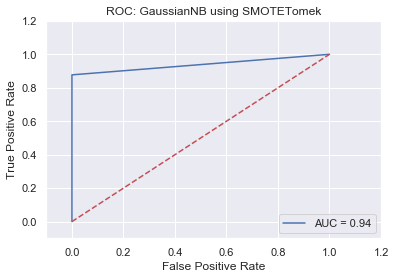

GaussianNB  with  SMOTETomek  scored =   91.35802469135803  on test set with AUC =  0.9385964912280702


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


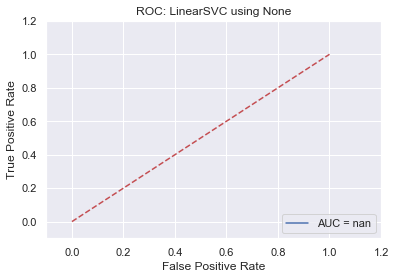

LinearSVC  with  None  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:780: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:88: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


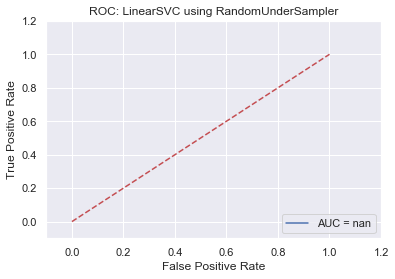

LinearSVC  with  RandomUnderSampler  scored =   66.66666666666666  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


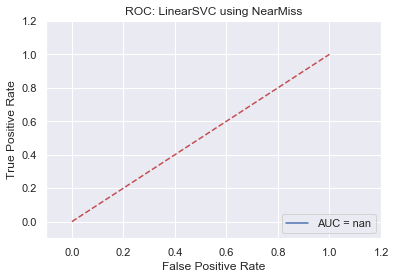

LinearSVC  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


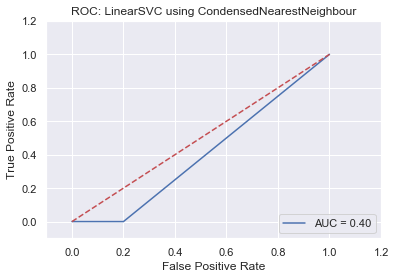

LinearSVC  with  CondensedNearestNeighbour  scored =   72.72727272727273  on test set with AUC =  0.4


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


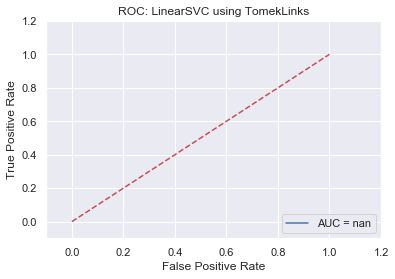

LinearSVC  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


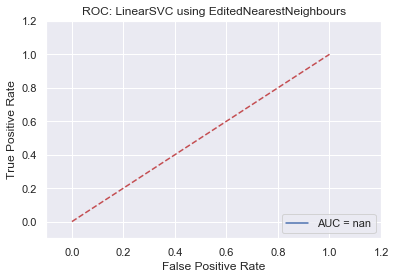

LinearSVC  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


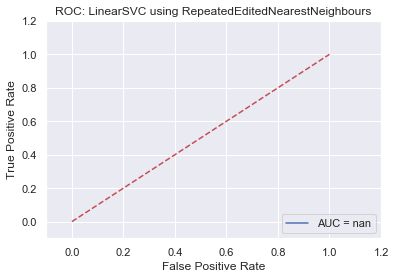

LinearSVC  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


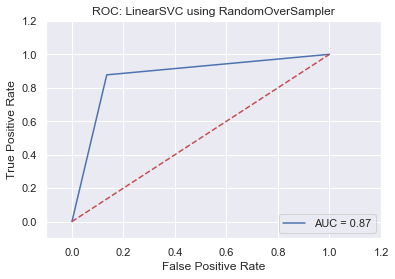

LinearSVC  with  RandomOverSampler  scored =   87.2340425531915  on test set with AUC =  0.8710289236605028


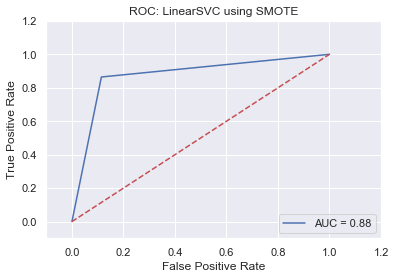

LinearSVC  with  SMOTE  scored =   87.2340425531915  on test set with AUC =  0.8750605326876513


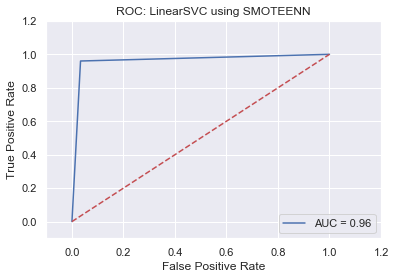

LinearSVC  with  SMOTEENN  scored =   96.25  on test set with AUC =  0.9633333333333334


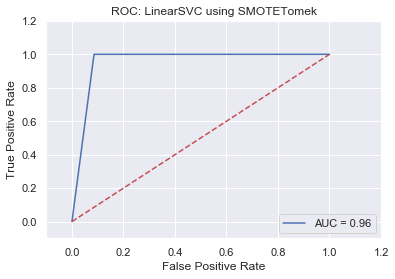

LinearSVC  with  SMOTETomek  scored =   96.05263157894737  on test set with AUC =  0.9571428571428571


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


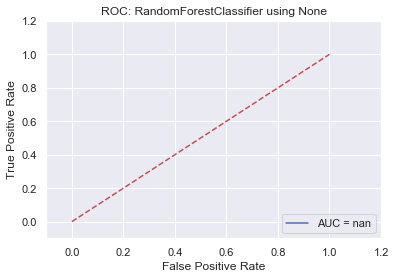

RandomForestClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


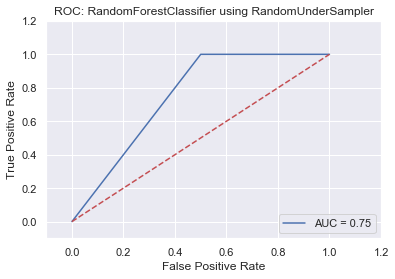

RandomForestClassifier  with  RandomUnderSampler  scored =   66.66666666666666  on test set with AUC =  0.75


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


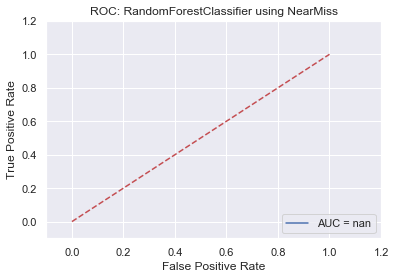

RandomForestClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


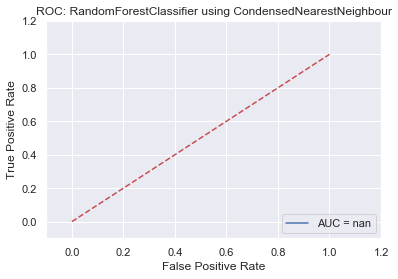

RandomForestClassifier  with  CondensedNearestNeighbour  scored =   91.66666666666666  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


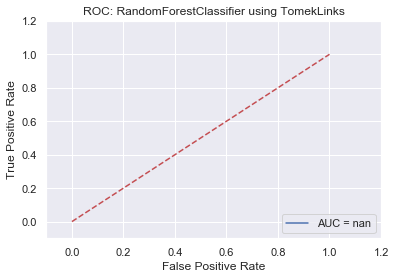

RandomForestClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


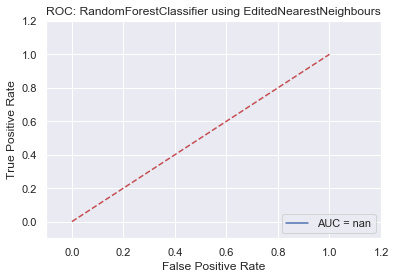

RandomForestClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


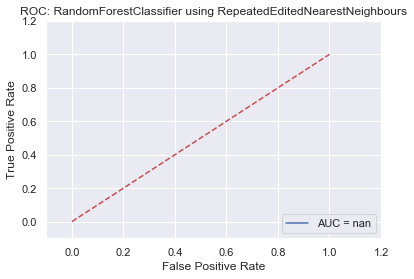

RandomForestClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


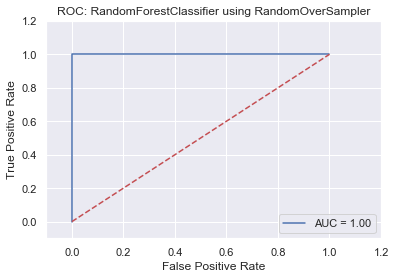

RandomForestClassifier  with  RandomOverSampler  scored =   100.0  on test set with AUC =  1.0


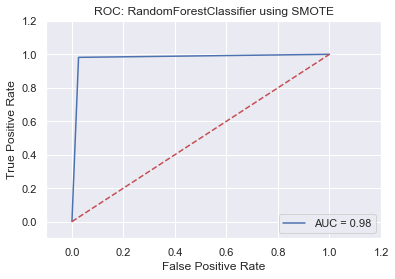

RandomForestClassifier  with  SMOTE  scored =   97.87234042553192  on test set with AUC =  0.9780885780885781


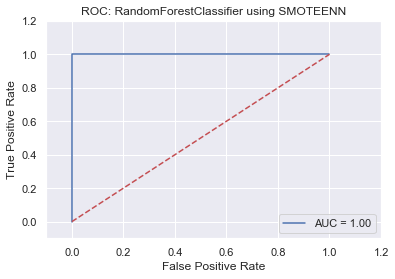

RandomForestClassifier  with  SMOTEENN  scored =   100.0  on test set with AUC =  1.0


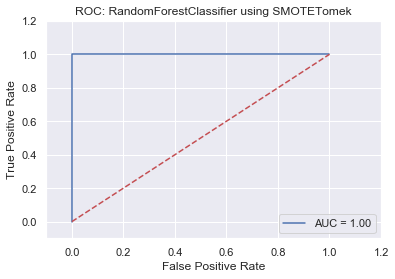

RandomForestClassifier  with  SMOTETomek  scored =   100.0  on test set with AUC =  1.0


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


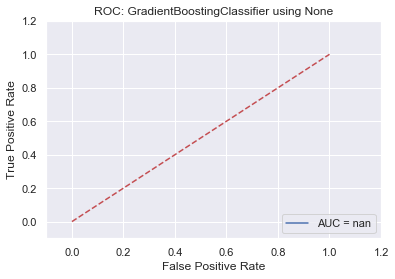

GradientBoostingClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


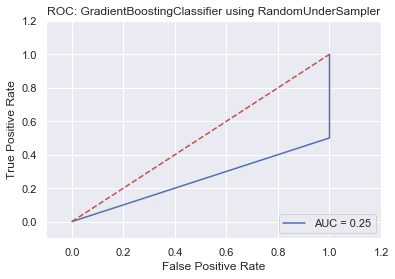

GradientBoostingClassifier  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  0.25


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


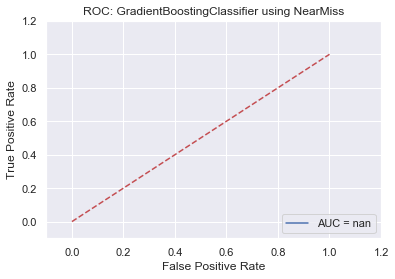

GradientBoostingClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


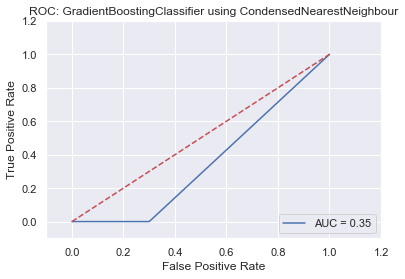

GradientBoostingClassifier  with  CondensedNearestNeighbour  scored =   63.63636363636363  on test set with AUC =  0.35


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


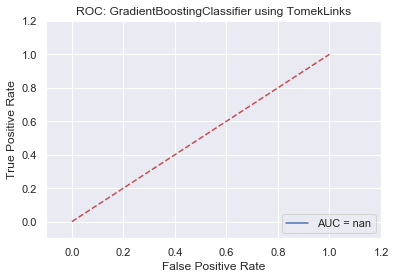

GradientBoostingClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


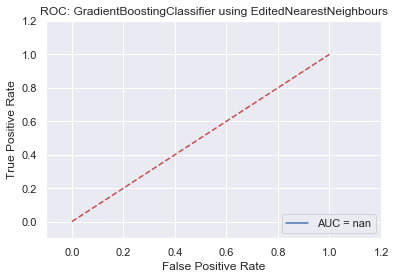

GradientBoostingClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


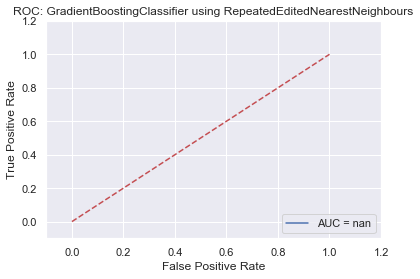

GradientBoostingClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


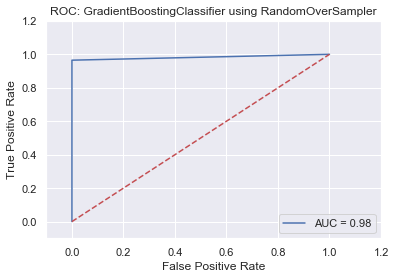

GradientBoostingClassifier  with  RandomOverSampler  scored =   97.87234042553192  on test set with AUC =  0.9824561403508771


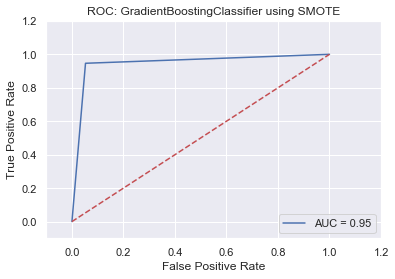

GradientBoostingClassifier  with  SMOTE  scored =   94.68085106382979  on test set with AUC =  0.9468984962406015


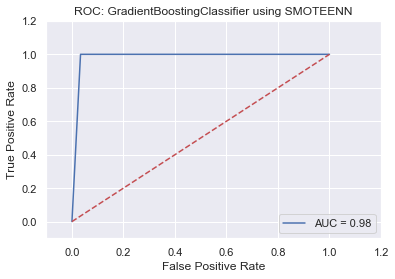

GradientBoostingClassifier  with  SMOTEENN  scored =   98.73417721518987  on test set with AUC =  0.9833333333333334


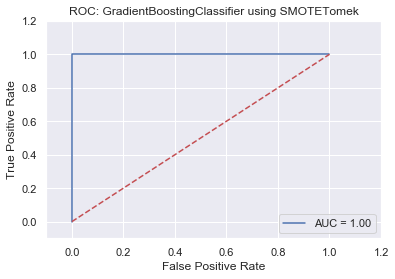

GradientBoostingClassifier  with  SMOTETomek  scored =   100.0  on test set with AUC =  1.0


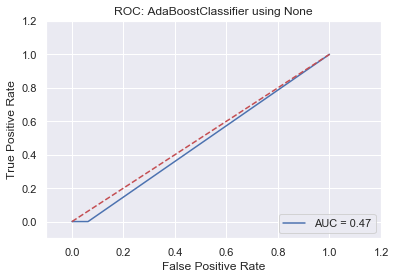

AdaBoostClassifier  with  None  scored =   91.83673469387756  on test set with AUC =  0.46875


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


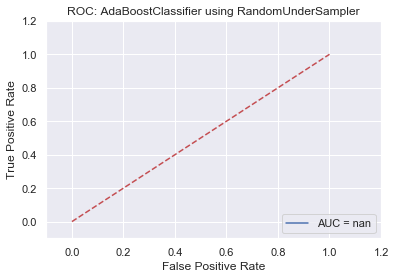

AdaBoostClassifier  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


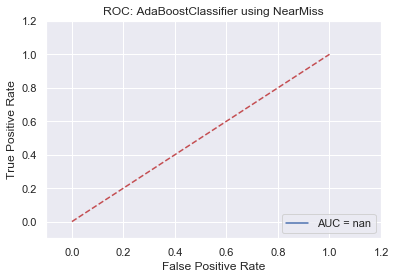

AdaBoostClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


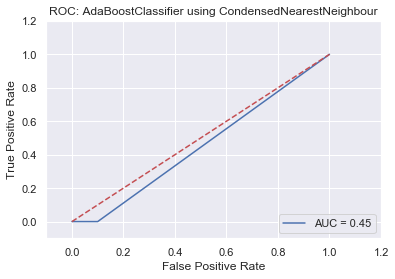

AdaBoostClassifier  with  CondensedNearestNeighbour  scored =   75.0  on test set with AUC =  0.45


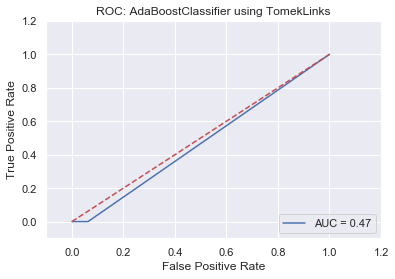

AdaBoostClassifier  with  TomekLinks  scored =   91.83673469387756  on test set with AUC =  0.46875


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


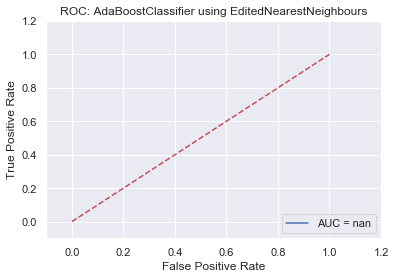

AdaBoostClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


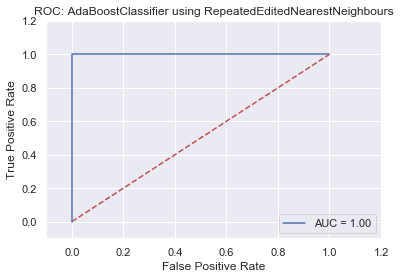

AdaBoostClassifier  with  RepeatedEditedNearestNeighbours  scored =   100.0  on test set with AUC =  1.0


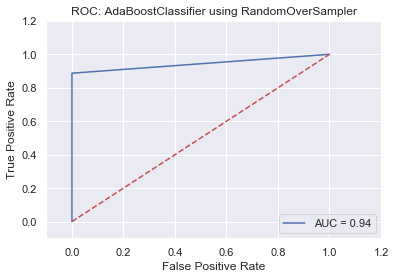

AdaBoostClassifier  with  RandomOverSampler  scored =   92.5531914893617  on test set with AUC =  0.9435483870967742


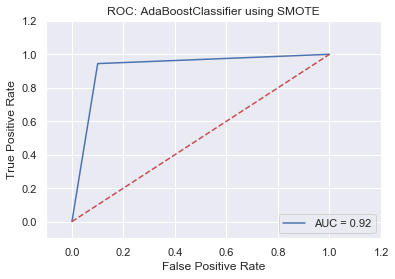

AdaBoostClassifier  with  SMOTE  scored =   92.5531914893617  on test set with AUC =  0.9222222222222223


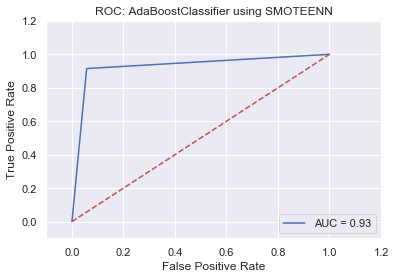

AdaBoostClassifier  with  SMOTEENN  scored =   92.6829268292683  on test set with AUC =  0.9288753799392095


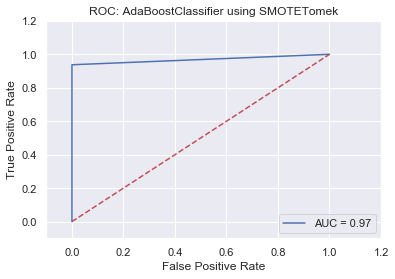

AdaBoostClassifier  with  SMOTETomek  scored =   96.1038961038961  on test set with AUC =  0.96875


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


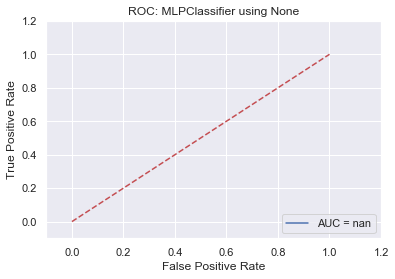

MLPClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


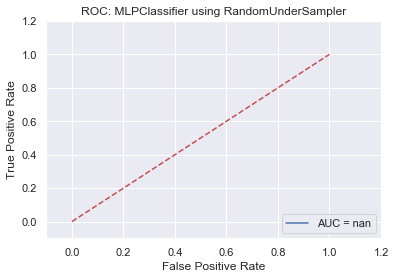

MLPClassifier  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


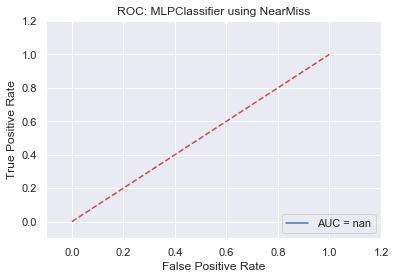

MLPClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


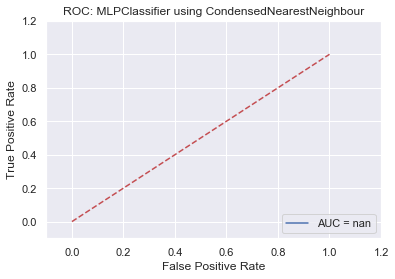

MLPClassifier  with  CondensedNearestNeighbour  scored =   91.66666666666666  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


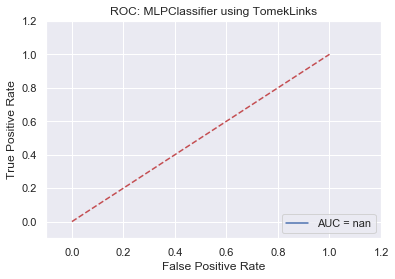

MLPClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


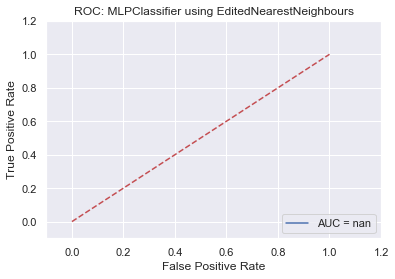

MLPClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


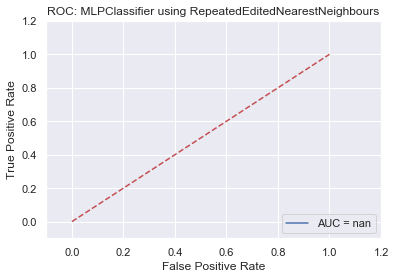

MLPClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


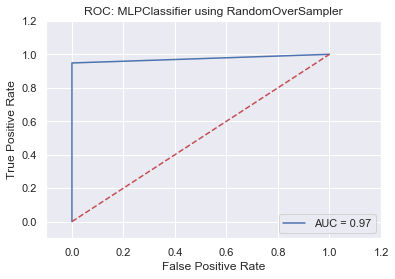

MLPClassifier  with  RandomOverSampler  scored =   96.80851063829788  on test set with AUC =  0.9741379310344828


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


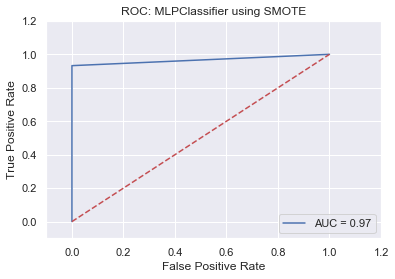

MLPClassifier  with  SMOTE  scored =   95.74468085106383  on test set with AUC =  0.9661016949152542


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


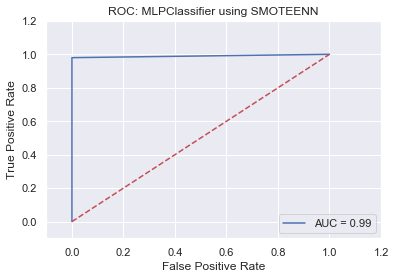

MLPClassifier  with  SMOTEENN  scored =   98.75  on test set with AUC =  0.99


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


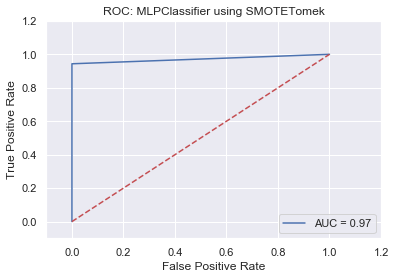

MLPClassifier  with  SMOTETomek  scored =   96.34146341463415  on test set with AUC =  0.9716981132075472


In [24]:
Classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB', 'LinearSVC', 'RandomForestClassifier',
               'GradientBoostingClassifier', 'AdaBoostClassifier', 'MLPClassifier']
Samplers = ['None', 'RandomUnderSampler', 'NearMiss', 'CondensedNearestNeighbour', 'TomekLinks', 'EditedNearestNeighbours',
            'RepeatedEditedNearestNeighbours', 'RandomOverSampler', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
summary = tryAll(Classifiers, Samplers, X, y)

### Summary

In [25]:
summ = pd.DataFrame(summary, columns = Samplers, index = Classifiers)
summ

,None,RandomUnderSampler,NearMiss,CondensedNearestNeighbour,TomekLinks,EditedNearestNeighbours,RepeatedEditedNearestNeighbours,RandomOverSampler,SMOTE,SMOTEENN,SMOTETomek
LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813426,0.852300,0.982759,0.944407
DecisionTreeClassifier,0.468750,1.00,NaN,0.454545,0.468750,0.5875,0.488372,0.982456,0.920581,0.980769,0.973333
KNeighborsClassifier,NaN,0.00,NaN,0.400000,NaN,NaN,NaN,0.974138,0.950820,0.938596,0.962963
GaussianNB,0.557692,0.00,NaN,0.642857,0.557692,0.5500,0.484375,0.866667,0.881944,0.915254,0.938596
LinearSVC,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,0.871029,0.875061,0.963333,0.957143
RandomForestClassifier,NaN,0.75,NaN,NaN,NaN,NaN,NaN,1.000000,0.978089,1.000000,1.000000
GradientBoostingClassifier,NaN,0.25,NaN,0.350000,NaN,NaN,NaN,0.982456,0.946898,0.983333,1.000000
AdaBoostClassifier,0.468750,NaN,NaN,0.450000,0.468750,NaN,1.000000,0.943548,0.922222,0.928875,0.968750
MLPClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974138,0.966102,0.990000,0.971698


### Cross validation scores for all the classifiers and samplers

In [26]:
X.shape, y.shape

((321, 22), (321,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 0)

In [28]:
#classifiers
logReg = LogisticRegression()
decTree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=4)
nb = GaussianNB()
svc = LinearSVC()
rf = RandomForestClassifier()
gradBst = GradientBoostingClassifier()
adaBst = AdaBoostClassifier()
MLP = MLPClassifier()

report_cv = np.zeros((11,9))

### Original data (before resampling)

In [29]:
cv_logReg = cross_val_score(logReg, X, y)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X, y)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X, y)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X, y)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X, y)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X, y)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X, y)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X, y)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X, y)
cv_MLP = cv_MLP.mean()

print('Before Resampling the real data: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[0, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

Before Resampling the real data: 
logReg:     0.9688461538461539
decTree:    0.9127403846153846
knn:        0.9688461538461539
nb:         0.5913942307692308
svc:        0.9657692307692308
rf:         0.9688461538461539
gradBst:    0.9470673076923077
adaBst:     0.9346634615384616
MLP:        0.9657211538461539


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Random Undersampling

In [30]:
sm = RandomUnderSampler()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Random undersampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[1, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


After applying Random undersampling technique: 
logReg:     0.55
decTree:    0.6
knn:        0.65
nb:         0.65
svc:        0.55
rf:         0.55
gradBst:    0.45
adaBst:     0.55
MLP:        0.55


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### NearMiss

In [31]:
sm = NearMiss()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying NearMiss sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[2, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


After applying NearMiss sampling technique: 
logReg:     0.4
decTree:    0.3
knn:        0.5
nb:         0.75
svc:        0.6
rf:         0.55
gradBst:    0.5
adaBst:     0.65
MLP:        0.4


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Condensed Nearest Neighbour

In [32]:
sm = CondensedNearestNeighbour()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Condensed Nearest Neighbours sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[3, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying Condensed Nearest Neighbours sampling technique: 
logReg:     0.822857142857143
decTree:    0.6742857142857142
knn:        0.8647619047619047
nb:         0.5790476190476189
svc:        0.7257142857142856
rf:         0.8647619047619047
gradBst:    0.7438095238095237
adaBst:     0.7838095238095237
MLP:        0.8380952380952381


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Tomek Links

In [33]:
sm = TomekLinks()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Tomek Links sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[4, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying Tomek Links sampling technique: 
logReg:     0.9688461538461539
decTree:    0.9066346153846154
knn:        0.9688461538461539
nb:         0.5913942307692308
svc:        0.9657692307692308
rf:         0.9688461538461539
gradBst:    0.9470673076923077
adaBst:     0.9346634615384616
MLP:        0.9657211538461539


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Edited Nearest Neighbours

In [34]:
sm = EditedNearestNeighbours()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Edited Nearest Neighbours sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[5, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying Edited Nearest Neighbours sampling technique: 
logReg:     0.9666666666666666
decTree:    0.8966666666666667
knn:        0.9666666666666666
nb:         0.6
svc:        0.9633333333333333
rf:         0.9666666666666666
gradBst:    0.9466666666666667
adaBst:     0.93
MLP:        0.9633333333333333


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Repeated Edited Nearest Neighbours

In [35]:
sm = RepeatedEditedNearestNeighbours()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Repeated Edited Nearest Neighbours sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[6, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying Repeated Edited Nearest Neighbours sampling technique: 
logReg:     0.9653962492437993
decTree:    0.9066545674531156
knn:        0.9653962492437993
nb:         0.6023593466424682
svc:        0.9619479733817302
rf:         0.9653962492437993
gradBst:    0.9550514216575923
adaBst:     0.9272232304900182
MLP:        0.9619479733817302


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Random Oversampling

In [36]:
sm = RandomOverSampler()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Random oversampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[7, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % s

After applying Random oversampling technique: 
logReg:     0.8424645161290323
decTree:    0.9726709677419354
knn:        0.9678322580645162
nb:         0.7859612903225806
svc:        0.8633290322580646
rf:         0.9983870967741936
gradBst:    0.9775225806451614
adaBst:     0.9517935483870967
MLP:        0.9775096774193548


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### SMOTE

In [37]:
sm = SMOTE()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying SMOTE sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[8, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying SMOTE sampling technique: 
logReg:     0.8294967741935485
decTree:    0.9163612903225806
knn:        0.8874709677419356
nb:         0.8084645161290321
svc:        0.8359483870967743
rf:         0.9630193548387096
gradBst:    0.9421290322580644
adaBst:     0.9098967741935484
MLP:        0.9389290322580646


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### SMOTE-ENN

In [38]:
sm = SMOTEENN()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying SMOTE + ENN sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[9, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying SMOTE + ENN sampling technique: 
logReg:     0.8984658790336801
decTree:    0.943554928584024
knn:        0.9642567448421795
nb:         0.8568859107741138
svc:        0.907899841297831
rf:         0.9849585611003351
gradBst:    0.9699347557749955
adaBst:     0.9567977429024864
MLP:        0.9680479633221655


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### SMOTE-Tomek

In [39]:
sm = SMOTETomek()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying SMOTE + Tomek Links sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[10, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying SMOTE + Tomek Links sampling technique: 
logReg:     0.8520387096774193
decTree:    0.9421548387096774
knn:        0.9115741935483872
nb:         0.8084645161290321
svc:        0.8616903225806452
rf:         0.9678451612903226
gradBst:    0.9453032258064515
adaBst:     0.8986451612903226
MLP:        0.9437677419354837


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Cross Validation Summary

In [40]:
report_cv = np.transpose(report_cv)
report_cv_df = pd.DataFrame(report_cv, columns = Samplers, index = Classifiers)
report_cv_df

,None,RandomUnderSampler,NearMiss,CondensedNearestNeighbour,TomekLinks,EditedNearestNeighbours,RepeatedEditedNearestNeighbours,RandomOverSampler,SMOTE,SMOTEENN,SMOTETomek
LogisticRegression,0.968846,0.55,0.40,0.822857,0.968846,0.966667,0.965396,0.842465,0.829497,0.898466,0.852039
DecisionTreeClassifier,0.912740,0.60,0.30,0.674286,0.906635,0.896667,0.906655,0.972671,0.916361,0.943555,0.942155
KNeighborsClassifier,0.968846,0.65,0.50,0.864762,0.968846,0.966667,0.965396,0.967832,0.887471,0.964257,0.911574
GaussianNB,0.591394,0.65,0.75,0.579048,0.591394,0.600000,0.602359,0.785961,0.808465,0.856886,0.808465
LinearSVC,0.965769,0.55,0.60,0.725714,0.965769,0.963333,0.961948,0.863329,0.835948,0.907900,0.861690
RandomForestClassifier,0.968846,0.55,0.55,0.864762,0.968846,0.966667,0.965396,0.998387,0.963019,0.984959,0.967845
GradientBoostingClassifier,0.947067,0.45,0.50,0.743810,0.947067,0.946667,0.955051,0.977523,0.942129,0.969935,0.945303
AdaBoostClassifier,0.934663,0.55,0.65,0.783810,0.934663,0.930000,0.927223,0.951794,0.909897,0.956798,0.898645
MLPClassifier,0.965721,0.55,0.40,0.838095,0.965721,0.963333,0.961948,0.977510,0.938929,0.968048,0.943768


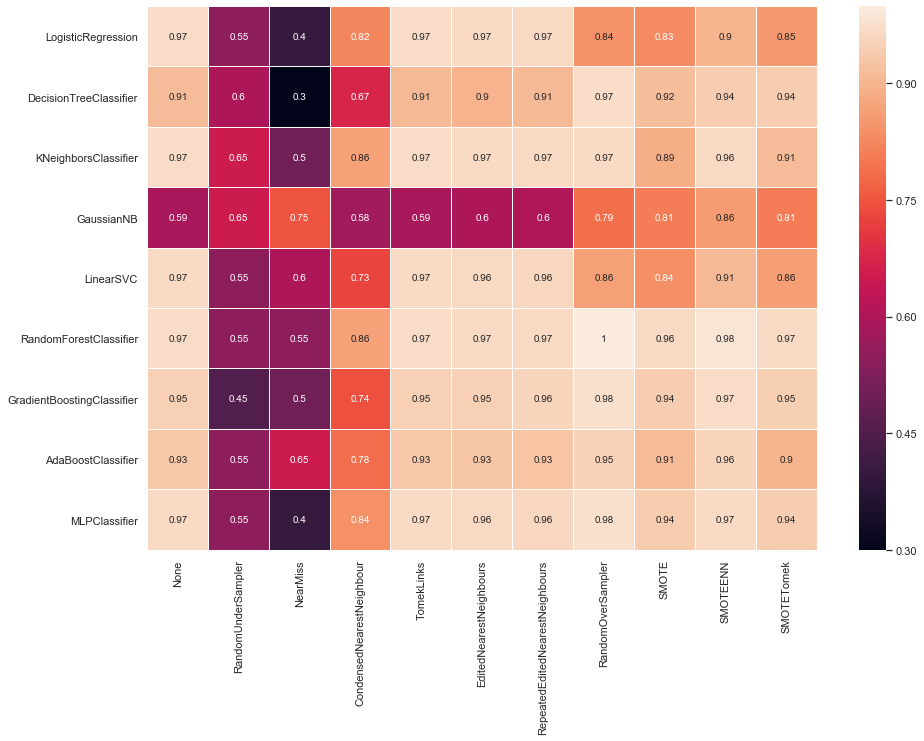

In [41]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(report_cv_df, xticklabels=Samplers, yticklabels=Classifiers, annot = True, linewidth=0.1)
plt.savefig("metric_mean_cv.png")